In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import streamlit as st
import pyfolio as pf
from sklearn.metrics import mean_squared_error

c:\users\jorda\miniconda3\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
tickers_csv = pd.read_csv('test_tics.csv')

In [3]:
tic = yf.Ticker('MSFT')

In [4]:
tic

yfinance.Ticker object <MSFT>

In [5]:
tic.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, organizations, and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutio

In [6]:
returnOnAssets = str(round(tic.info['returnOnAssets']*100,2)) + '%'
returnOnAssets

'13.76%'

In [7]:
str(tic.info['currentPrice'])

'296.77'

In [8]:
tic.info['earningsGrowth']

0.486

In [9]:
y_earningsGrowth = str(round(tic.info['earningsGrowth']*100,3)) + '%'
y_earningsGrowth

'48.6%'

In [10]:
y_returnOnEquity = str(round(tic.info['returnOnEquity']*100,3)) + '%'
y_returnOnEquity

'47.079%'

In [11]:
str(tic.info['currentRatio'])

'2.08'

In [12]:
str(round(tic.info['debtToEquity'],3))

'57.947'

In [13]:
tic.info['longBusinessSummary']

'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, organizations, and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification to developers and IT professionals on Microsoft products. Its More

In [14]:
tic.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
2021-08-18    0.56
Name: Dividends, Length: 71, dtype: float64

In [15]:
tic.info['currentPrice']

296.77

In [16]:
hist = tic.history(period='max')

In [17]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.00,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.00,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.00,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.00,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2021-08-13,288.926880,292.340328,288.747201,292.290436,18231400,0.00,0.0
2021-08-16,292.629800,294.256690,289.465843,294.037109,22507600,0.00,0.0
2021-08-17,291.831335,292.869326,290.523810,292.519989,20075300,0.00,0.0


In [18]:
len(hist)

8933

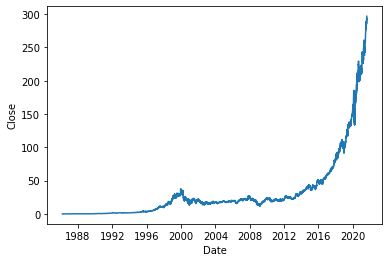

In [19]:
sns.lineplot(data=hist, x='Date', y='Close');

In [20]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.00,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.00,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.00,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.00,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2021-08-13,288.926880,292.340328,288.747201,292.290436,18231400,0.00,0.0
2021-08-16,292.629800,294.256690,289.465843,294.037109,22507600,0.00,0.0
2021-08-17,291.831335,292.869326,290.523810,292.519989,20075300,0.00,0.0


In [21]:
close = hist[['Close']]
close

,Close
Date,
1986-03-13,0.061491
1986-03-14,0.063687
1986-03-17,0.064785
1986-03-18,0.063138
1986-03-19,0.062040
...,...
2021-08-13,292.290436
2021-08-16,294.037109
2021-08-17,292.519989


In [22]:
hist.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19'],
              dtype='datetime64[ns]', name='Date', length=8933, freq=None)

In [23]:
hist.High.max()

297.4700012207031

In [24]:
x = hist.index[hist['High'] == hist.High.max()].tolist()

In [25]:
x = x[0]

In [26]:
type(x)

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
day_high = x.strftime('%A %B %d, %Y')
day_high

'Thursday August 19, 2021'

In [28]:
high_price = hist.High.max().round(3)
high_price

297.47

In [29]:
tic.info['shortName']

'Microsoft Corporation'

In [30]:
hist.High.max().round(3)

297.47

In [31]:
at_high_d = hist.index[hist['High'] == hist.High.max()].tolist()
at_high_d = at_high_d[0]
at_high_d = at_high_d.strftime('%A %B %d, %Y')

In [32]:
recs = tic.recommendations[-10:]
recs

,Firm,To Grade,From Grade,Action
Date,,,,
2021-07-22 14:17:55,Cowen & Co.,Outperform,,main
2021-07-23 14:54:35,Barclays,Overweight,,main
2021-07-28 11:35:54,Rosenblatt,Buy,,main
2021-07-28 12:26:32,Stifel,Buy,,main
2021-07-28 13:22:55,Morgan Stanley,Overweight,,main
2021-07-28 14:47:46,Barclays,Overweight,,main
2021-07-28 14:49:16,Citigroup,Buy,,main
2021-07-28 14:51:12,Mizuho,Buy,,main
2021-07-28 14:54:54,Credit Suisse,Outperform,,main


In [33]:
recs = recs[['Firm', 'To Grade']]
recs

,Firm,To Grade
Date,,
2021-07-22 14:17:55,Cowen & Co.,Outperform
2021-07-23 14:54:35,Barclays,Overweight
2021-07-28 11:35:54,Rosenblatt,Buy
2021-07-28 12:26:32,Stifel,Buy
2021-07-28 13:22:55,Morgan Stanley,Overweight
2021-07-28 14:47:46,Barclays,Overweight
2021-07-28 14:49:16,Citigroup,Buy
2021-07-28 14:51:12,Mizuho,Buy
2021-07-28 14:54:54,Credit Suisse,Outperform


In [34]:
recs.rename(columns={"To Grade": "Grade"})


,Firm,Grade
Date,,
2021-07-22 14:17:55,Cowen & Co.,Outperform
2021-07-23 14:54:35,Barclays,Overweight
2021-07-28 11:35:54,Rosenblatt,Buy
2021-07-28 12:26:32,Stifel,Buy
2021-07-28 13:22:55,Morgan Stanley,Overweight
2021-07-28 14:47:46,Barclays,Overweight
2021-07-28 14:49:16,Citigroup,Buy
2021-07-28 14:51:12,Mizuho,Buy
2021-07-28 14:54:54,Credit Suisse,Outperform


In [35]:
recs = tic.recommendations[-10:]
recs = recs[['Firm', 'To Grade']]
recs = recs.rename(columns={'To Grade': 'Grade'})
recs

,Firm,Grade
Date,,
2021-07-22 14:17:55,Cowen & Co.,Outperform
2021-07-23 14:54:35,Barclays,Overweight
2021-07-28 11:35:54,Rosenblatt,Buy
2021-07-28 12:26:32,Stifel,Buy
2021-07-28 13:22:55,Morgan Stanley,Overweight
2021-07-28 14:47:46,Barclays,Overweight
2021-07-28 14:49:16,Citigroup,Buy
2021-07-28 14:51:12,Mizuho,Buy
2021-07-28 14:54:54,Credit Suisse,Outperform


In [36]:
if tic.info['earningsGrowth'] != None:
    y_earningsGrowth = str(round(tic.info['earningsGrowth']*100,3)) + '%'
else:
    y_earningsGrowth = 'No Data'

### Lookback window training

In [37]:
hist_yr = tic.history(period='1y')

In [38]:
hist_yr = hist_yr[['Close']]

In [39]:
# Lookback window training
lookback = []
error = []
for index in range(2,30):
    lookback.append(index)
    error.append(mean_squared_error(hist_yr.Close[30:201], 
                                    hist_yr["Close"].rolling(index).mean()[29:200]))
tab = np.array((lookback, error)).T
df = pd.DataFrame(tab, columns = ['lookback', 'error'])
lb = df.loc[df.error == df.error.min(), 'lookback'].values[0].astype('int')

In [40]:
lb

2

In [41]:
hist_yr["Close"].rolling(2).mean()[29:200]

Date
2020-09-30    206.896515
2020-10-01    209.472878
2020-10-02    207.421700
2020-10-05    206.391159
2020-10-06    206.252426
                 ...    
2021-05-28    249.018272
2021-06-01    248.065094
2021-06-02    246.877373
2021-06-03    246.033997
2021-06-04    247.775658
Name: Close, Length: 171, dtype: float64

In [42]:
hist_yr.Close[30:201]

Date
2020-10-01    210.528198
2020-10-02    204.315201
2020-10-05    208.467117
2020-10-06    204.037735
2020-10-07    207.922119
                 ...    
2021-06-01    246.927277
2021-06-02    246.827469
2021-06-03    245.240524
2021-06-04    250.310791
2021-06-07    253.325027
Name: Close, Length: 171, dtype: float64

In [43]:
# 2 is best for lookback window

In [44]:
# trying out pyfolio (wont' add into final project because package is unreliable with many stocks)

In [45]:
tic

yfinance.Ticker object <MSFT>

In [46]:
history = tic.history(period='max')
history.index = history.index.tz_localize('utc')
history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8933 entries, 1986-03-13 00:00:00+00:00 to 2021-08-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8933 non-null   float64
 1   High          8933 non-null   float64
 2   Low           8933 non-null   float64
 3   Close         8933 non-null   float64
 4   Volume        8933 non-null   int64  
 5   Dividends     8933 non-null   float64
 6   Stock Splits  8933 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 558.3 KB


In [47]:
returns = history.Close.pct_change()
returns

Date
1986-03-13 00:00:00+00:00         NaN
1986-03-14 00:00:00+00:00    0.035712
1986-03-17 00:00:00+00:00    0.017250
1986-03-18 00:00:00+00:00   -0.025432
1986-03-19 00:00:00+00:00   -0.017390
                               ...   
2021-08-13 00:00:00+00:00    0.010490
2021-08-16 00:00:00+00:00    0.005976
2021-08-17 00:00:00+00:00   -0.005160
2021-08-18 00:00:00+00:00   -0.006119
2021-08-19 00:00:00+00:00    0.020775
Name: Close, Length: 8933, dtype: float64

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,69.39,1999-12-27,2009-03-09,2014-07-16,3798
1,50.32,1987-10-05,1987-10-26,1989-10-05,524
2,34.7,1990-07-16,1990-08-23,1991-01-16,133
3,28.66,1987-05-08,1987-07-07,1987-09-28,102
4,28.04,2020-02-10,2020-03-16,2020-06-08,86


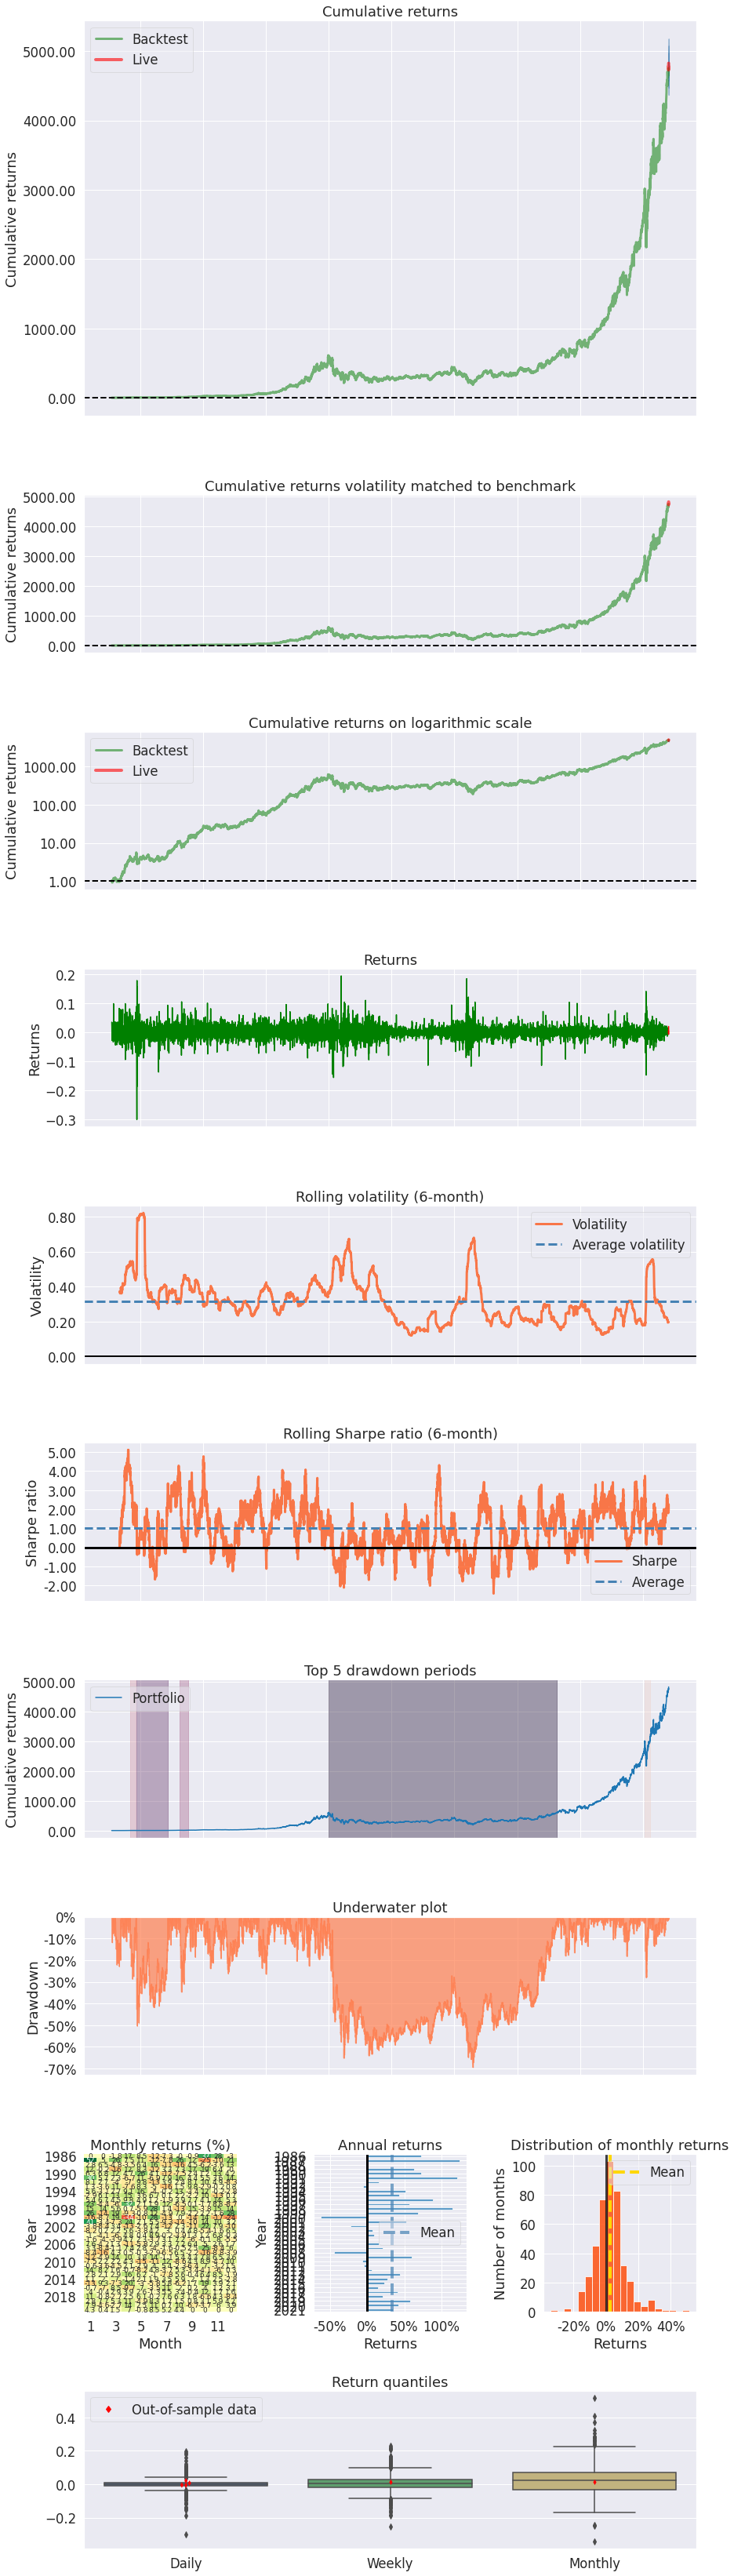

In [48]:
pf.create_returns_tear_sheet(returns, live_start_date='2021-8-15')